In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g.pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for data visualization %matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings('ignore')
data = 'F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive/breast-cancer-wisconsin.data.txt'
df = pd.read_csv(data, header=None)
# view dimensions of dataset
df.shape
# preview the dataset
df.head()

F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\breast-cancer-wisconsin.data.txt
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\gender_classification_v7.csv
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\knn.ipynb
F:/Kuliah/S6/Machine Learning/Praktek Python 1/archive\naivebayes.ipynb


,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump_thickness              699 non-null    int64  
 1   Uniformity_Cell_Size         699 non-null    int64  
 2   Uniformity_Cell_Shape        699 non-null    int64  
 3   Marginal_Adhesion            699 non-null    int64  
 4   Single_Epithelial_Cell_Size  683 non-null    float64
 5   Bare_Nuclei                  699 non-null    int64  
 6   Bland_Chromatin              699 non-null    int64  
 7   Normal_Nucleoli              699 non-null    int64  
 8   Class                        699 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 49.3 KB
Clump_thickness
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64
Uniformity_Cell_Size
1     353
2      59
10     58
3      56
4   

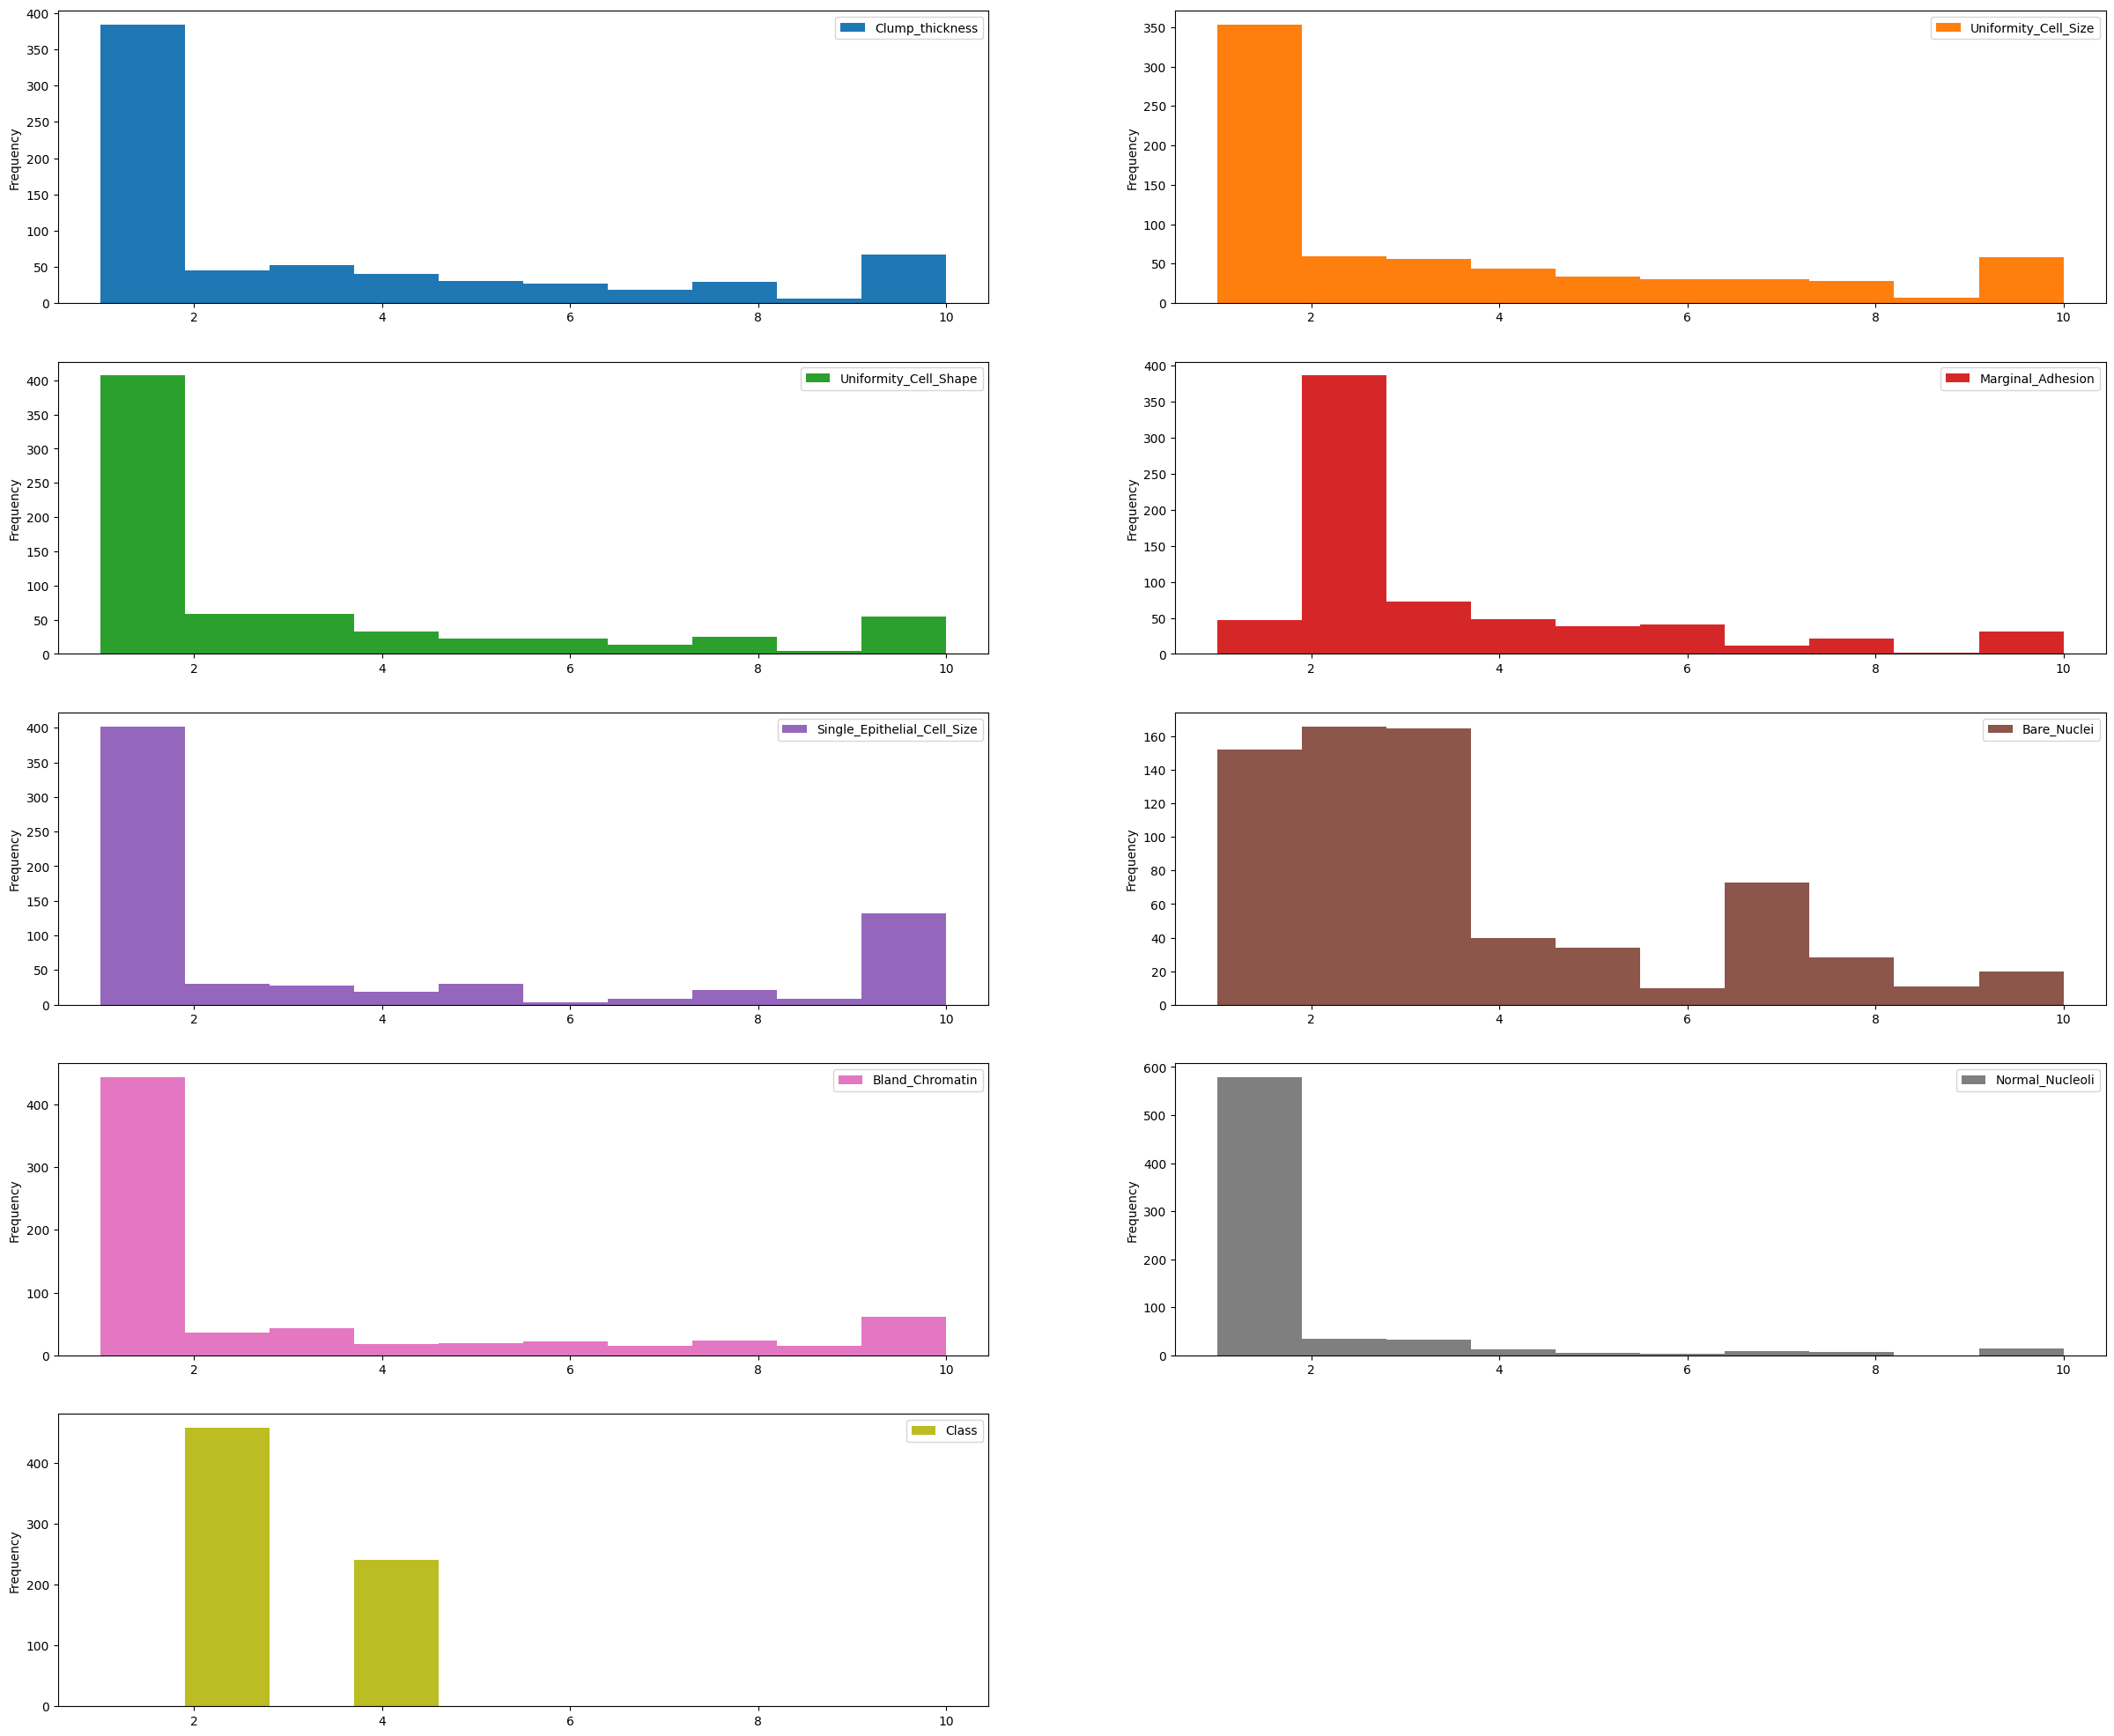

In [7]:
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size',
'Uniformity_Cell_Shape', 'Marginal_Adhesion',
'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
'Bland_Chromatin', 'Normal_Nucleoli', 'Class']
df.columns = col_names
df.columns

# let's agian preview the dataset
df.head()

# drop Id column from dataset
df.drop('Id', axis=1, inplace=True)

# view summary of dataset
df.info()
for var in df.columns:
 print(df[var].value_counts())
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'],
errors='coerce')
df.dtypes

# check missing values in variables
df.isnull().sum()

# check `na` values in the dataframe
df.isna().sum()

# check frequency distribution of `Bare_Nuclei` column
df['Bare_Nuclei'].value_counts()

# check for nan values in `Bare_Nuclei` column
df['Bare_Nuclei'].isna().sum()

# view frequency distribution of values in `Class` variable
df['Class'].value_counts()

# view percentage of frequency distribution of values in`Class` variable
df['Class'].value_counts()/np.float64(len(df))

# view summary statistics in numerical variables
print(round(df.describe(),2))

# plot histograms of the variables
plt.rcParams['figure.figsize']=(30,25)
df.plot(kind='hist', bins=10, subplots=True, layout=(5,2),
sharex=False, sharey=False)
plt.show()

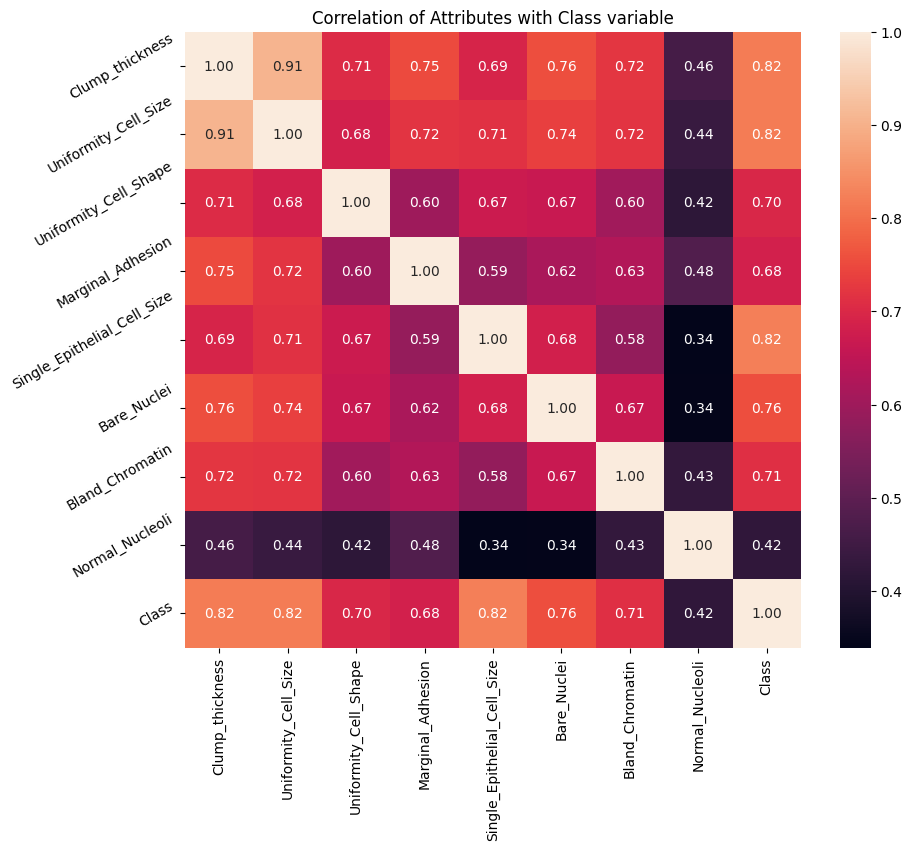

In [8]:
correlation = df.corr()
correlation['Class'].sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.title('Correlation of Attributes with Class variable')
a = sns.heatmap(correlation, square=True, annot=True,
fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)
plt.show()

In [9]:
X = df.drop(['Class'], axis=1)
y = df['Class']

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size = 0.2, random_state = 0)

In [10]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape
# check data types in X_train
X_train.dtypes
# check missing values in numerical variables in X_train
X_train.isnull().sum()
# check missing values in numerical variables in X_test
X_test.isnull().sum()

# print percentage of missing values in the numericalvariables in training set
for col in X_train.columns:
 if X_train[col].isnull().mean()>0:
    print(col, round(X_train[col].isnull().mean(),4))

# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
 for col in X_train.columns:
    col_median=X_train[col].median()
    df1[col].fillna(col_median, inplace=True)

# check again missing values in numerical variables in
X_train
X_train.isnull().sum()

# check missing values in numerical variables in X_test
X_test.isnull().sum()
# print percentage of missing values in the numerical variables in training set
for col in X_train.columns:
 if X_train[col].isnull().mean()>0:
    print(col, round(X_train[col].isnull().mean(),4))

# impute missing values in X_train and X_test with respective column median in X_train
for df1 in [X_train, X_test]:
 for col in X_train.columns:
    col_median=X_train[col].median()
    df1[col].fillna(col_median, inplace=True)

# check again missing values in numerical variables in
X_train
X_train.isnull().sum()

# check missing values in numerical variables in X_test
X_test.isnull().sum()
X_train.head()
X_test.head() 
cols = X_train.columns


Single_Epithelial_Cell_Size 0.0233


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])
X_train.head()
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
knn = KNeighborsClassifier(n_neighbors=3)
# fit the model to the training set
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
y_pred
# probability of getting output as 2 - benign cancer
knn.predict_proba(X_test)[:,0]
# probability of getting output as 4 - malignant cancer
knn.predict_proba(X_test)[:,1]
from sklearn.metrics import accuracy_score
print('Model accuracy score: {0:0.4f}'.
format(accuracy_score(y_test, y_pred)))
y_pred_train = knn.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'.
format(accuracy_score(y_train, y_pred_train)))
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(X_train,
y_train)))
print('Test set score: {:.4f}'.format(knn.score(X_test,
y_test)))
# check class distribution in test set
y_test.value_counts()
# check null accuracy score
null_accuracy = (85/(85+55))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))
# instantiate the model with k=5
knn_5 = KNeighborsClassifier(n_neighbors=5)

Model accuracy score: 0.9500
Training-set accuracy score: 0.9714
Training set score: 0.9714
Test set score: 0.9500
Null accuracy score: 0.6071


In [12]:
# fit the model to the training set
knn_5.fit(X_train, y_train)
# predict on the test-set
y_pred_5 = knn_5.predict(X_test)
print('Model accuracy score with k=5 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_5)))
# instantiate the model with k=6
knn_6 = KNeighborsClassifier(n_neighbors=6)
# fit the model to the training set
knn_6.fit(X_train, y_train)
# predict on the test-set
y_pred_6 = knn_6.predict(X_test)
print('Model accuracy score with k=6 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_6)))
# instantiate the model with k=7
knn_7 = KNeighborsClassifier(n_neighbors=7)
# fit the model to the training set
knn_7.fit(X_train, y_train)
# predict on the test-set
y_pred_7 = knn_7.predict(X_test)
print('Model accuracy score with k=7 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_7)))
# instantiate the model with k=8
knn_8 = KNeighborsClassifier(n_neighbors=8)
# fit the model to the training set
knn_8.fit(X_train, y_train)
# predict on the test-set
y_pred_8 = knn_8.predict(X_test)
print('Model accuracy score with k=8 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_8)))
# instantiate the model with k=9
knn_9 = KNeighborsClassifier(n_neighbors=9)
# fit the model to the training set
knn_9.fit(X_train, y_train)
# predict on the test-set
y_pred_9 = knn_9.predict(X_test)
print('Model accuracy score with k=9 : {0:0.4f}'.
format(accuracy_score(y_test, y_pred_9)))

Model accuracy score with k=5 : 0.9571
Model accuracy score with k=6 : 0.9571
Model accuracy score with k=7 : 0.9643
Model accuracy score with k=8 : 0.9643
Model accuracy score with k=9 : 0.9571


Confusion matrix

 [[81  4]
 [ 3 52]]

True Positives(TP) =  81

True Negatives(TN) =  52

False Positives(FP) =  4

False Negatives(FN) =  3
Confusion matrix

 [[82  3]
 [ 2 53]]

True Positives(TP) =  82

True Negatives(TN) =  53

False Positives(FP) =  3

False Negatives(FN) =  2


<Axes: >

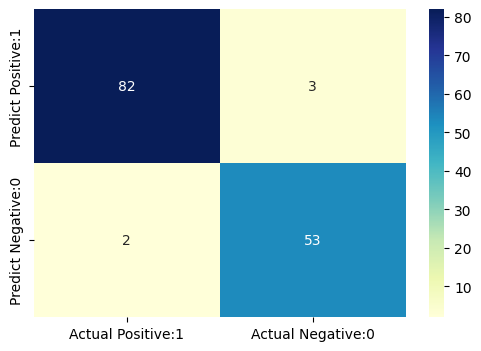

In [13]:
# Print the Confusion Matrix with k =3 and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

# Print the Confusion Matrix with k =7 and slice it into four pieces
cm_7 = confusion_matrix(y_test, y_pred_7)
print('Confusion matrix\n\n', cm_7)
print('\nTrue Positives(TP) = ', cm_7[0,0])
print('\nTrue Negatives(TN) = ', cm_7[1,1])
print('\nFalse Positives(FP) = ', cm_7[0,1])
print('\nFalse Negatives(FN) = ', cm_7[1,0])

# visualize confusion matrix with seaborn heatmap
plt.figure(figsize=(6,4))
cm_matrix = pd.DataFrame(data=cm_7, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1','Predict Negative:0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_7))
TP = cm_7[0,0]
TN = cm_7[1,1]
FP = cm_7[0,1]
FN = cm_7[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))
# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))
# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

# print the first 10 predicted probabilities of two classes2 and 4
y_pred_prob = knn.predict_proba(X_test)[0:10]
y_pred_prob
# store the probabilities in dataframe
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - benign cancer (2)', 'Prob of - malignant cancer (4)'])
y_pred_prob_df

# print the first 10 predicted probabilities for class 4 - Probability of malignant cancer
knn.predict_proba(X_test)[0:10, 1]
# store the predicted probabilities for class 4 - Probability of malignant cancer
y_pred_1 = knn.predict_proba(X_test)[:, 1]
# plot histogram of predicted probabilities
# adjust figure size
plt.figure(figsize=(6,4))

              precision    recall  f1-score   support

           2       0.98      0.96      0.97        85
           4       0.95      0.96      0.95        55

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Classification accuracy : 0.9643
Classification error : 0.0357
Precision : 0.9647
Recall or Sensitivity : 0.9762
True Positive Rate : 0.9762
False Positive Rate : 0.0536
Specificity : 0.9464


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Text(0, 0.5, 'Frequency')

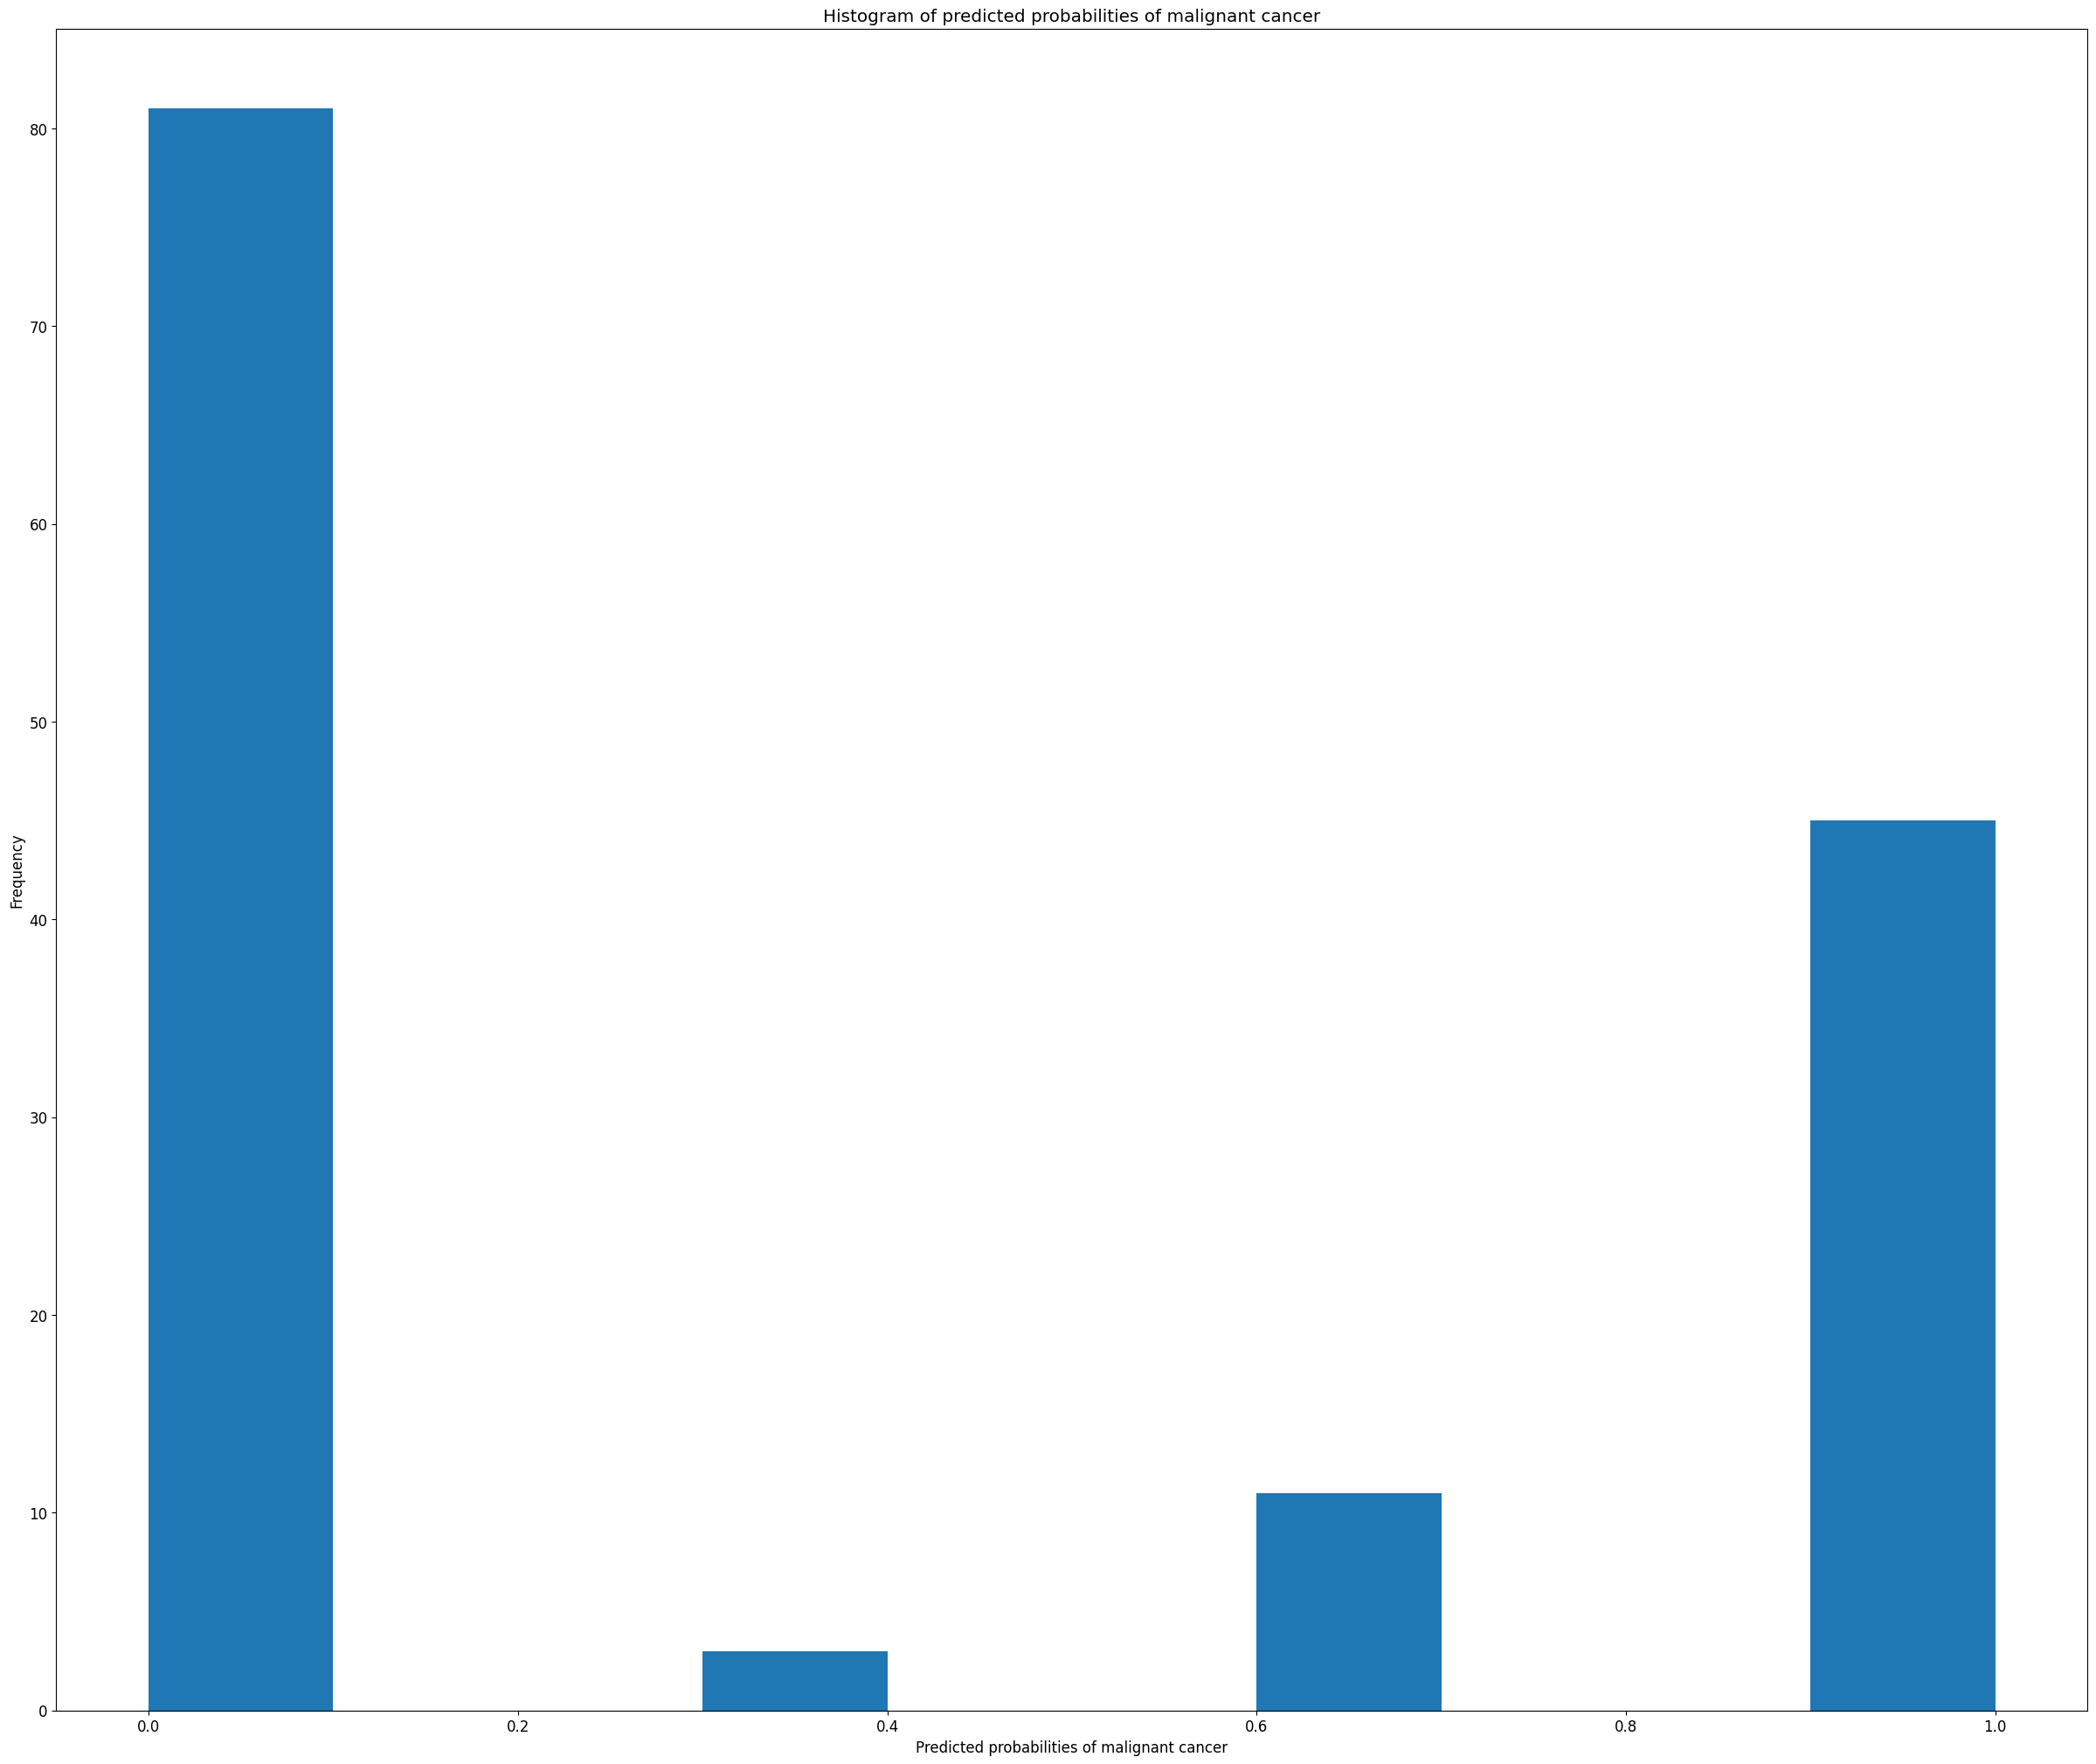

In [15]:
# adjust the font size
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred_1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of malignant cancer')
# set the title
plt.xlabel('Predicted probabilities of malignant cancer')
plt.ylabel('Frequency')

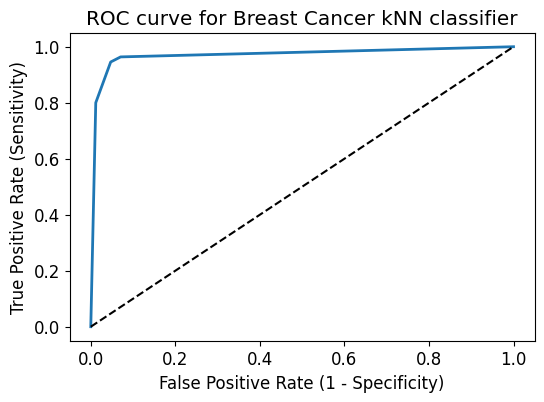

In [16]:
# plot ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,
y_pred_1,pos_label=4)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Breast Cancer kNN classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [17]:
# compute ROC AUC
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test, y_pred_1)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(knn_7, X_train, y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_7, X_train, y_train, cv = 10,
scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

ROC AUC : 0.9705
Cross validated ROC AUC : 0.9835
Cross-validation scores:[0.89285714 0.96428571 0.94642857 0.96428571 0.94642857 0.98214286
 1.         0.98214286 0.96428571 0.96363636]
Average cross-validation score: 0.9606
